In [6]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
import numpy as np
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1]**2))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1]**2))

print(f"train shape: {x_train.shape}")
print(f"test shape: {x_test.shape}")

train shape: (60000, 784)
test shape: (10000, 784)


In [8]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(f"MAX: {np.max(x_train)} \tMIN: {np.min(x_train)}")

MAX: 1.0 	MIN: 0.0


In [9]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class MnistClassifier(Model):
    def __init__(self):
        super().__init__()
        num_classes = 10
        self.first_dense = Dense(32, activation="relu")
        self.second_dense = Dense(32, activation="relu")
        self.classifier = Dense(num_classes, activation="softmax")

    def call(self, inputs):
        x = self.first_dense(inputs)
        x = self.second_dense(x)
        result = self.classifier(x)
        return result

In [10]:
model = MnistClassifier()

model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [11]:
res = model.fit(x_train,
                y_train,
                epochs=10, 
                batch_size=128,
                validation_split=(0.2))

Epoch 1/10
375/375 [==============================] - 5s 4ms/step - loss: 0.4959 - accuracy: 0.8659 - val_loss: 0.2513 - val_accuracy: 0.9271
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.2372 - accuracy: 0.9320 - val_loss: 0.1988 - val_accuracy: 0.9427
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1909 - accuracy: 0.9444 - val_loss: 0.1824 - val_accuracy: 0.9465
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1638 - accuracy: 0.9523 - val_loss: 0.1623 - val_accuracy: 0.9541
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1450 - accuracy: 0.9577 - val_loss: 0.1603 - val_accuracy: 0.9509
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1308 - accuracy: 0.9616 - val_loss: 0.1457 - val_accuracy: 0.9561
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1190 - accuracy: 0.9647 - val_loss: 0.1398 - val_accuracy: 0.9597
Epoch 

In [12]:
loss = res.history["loss"]
acc = res.history["accuracy"]
val_loss = res.history["val_loss"]
val_acc = res.history["val_accuracy"]

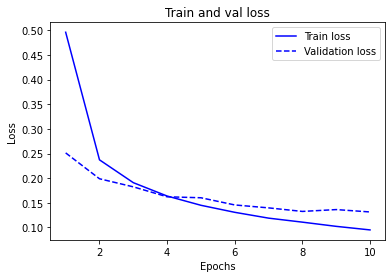

In [13]:
import matplotlib.pyplot as plt

x_range = range(1, len(loss) +1)

plt.plot(x_range, loss, "b", label="Train loss")
plt.plot(x_range, val_loss, "b--", label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Train and val loss")
plt.legend()
plt.show()

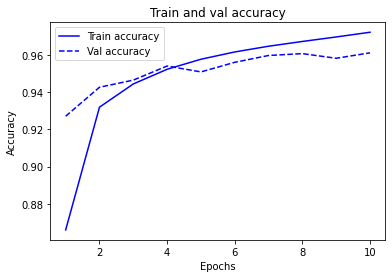

In [14]:
plt.plot(x_range, acc, "b", label="Train accuracy")
plt.plot(x_range, val_acc, "b--", label="Val accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Train and val accuracy")
plt.legend()
plt.show()